In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import csv
import numpy as np
### Leer archivo .csv
def readCSV(file):
    with open(file, newline='') as File:
        reader = csv.reader(File)
        data = []
        line = []
        i = 0
        for r in reader:
            if i > 1:
                line = []
                for i in range(1, len(r)):
                    line.append( int(r[i]) )
                data.append(line)
            i += 1
    return data

#guardamos los datos de entrenamiento
raw_data = readCSV('/content/drive/My Drive/RNA/Proyecto/default of credit card clients.csv')
#raw_data = readCSV('default of credit card clients.csv')


def minmaxColumn(my_list, func):

    m = len(my_list)
    n = len(my_list[0])

    list2 = []  # stores the column wise maximas
    for col in range(n):  # iterate over all columns
        col_max = my_list[0][col]  # assume the first element of the column(the top most) is the maximum
        for row in range(1, m):  # iterate over the column(top to down)

            col_max = func(col_max, my_list[row][col])

        list2.append(col_max)
    return list2

def genData(rawData):
    N = len(rawData)
    train = round(N * 0.75)
    X = []
    Y = []
    C = []
    D = []
    G = []
    H = []
    a = 0
    for i in range(N):
        if a < 6637 * 2 and rawData[i][-1] == 1:
          X.append(np.array(rawData[i][:-1]))
          Y.append(np.array(rawData[i][-1]))
          a += 1
        if rawData[i][-1] == 0:
          C.append(np.array(rawData[i][:-1]))
          D.append(np.array(rawData[i][-1]))

    for i in range(6636):
        G.append(X[i])
        G.append(X[i + 6636])
        G.append(C[i])
        H.append(Y[i])
        H.append(Y[i  + 6636])
        H.append(D[i])
    
    train = round(len(G) * 0.66)
    return G[:train] , H[:train] , G[train:] , H[train:]

maxValues = minmaxColumn(raw_data, max)
minValues = minmaxColumn(raw_data, min)

print("Valores maximos antes del escalamiento")
print(maxValues)
print("Valores minimos antes del escalamiento")
print(minValues)

for X in raw_data:
    for i in range(len(X)):
        X[i] = (maxValues[i] - X[i]) / (maxValues[i] - minValues[i])

print("Valores maximos despues del escalamiento")
print(minmaxColumn(raw_data, max))
print("Valores minimos despues del escalamiento")
print(minmaxColumn(raw_data, min))

train_data, train_labels, test_data, test_labels = genData(raw_data)

a = 0
b = 0
for i in train_labels:
    if i == 1:
      a += 1
    if i == 0:
      b += 1
print(a)
print(b)

c = 0
d = 0
for i in test_labels:
    if i == 1:
      c += 1
    if i == 0:
      d += 1
print(c)
print(d)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Valores maximos antes del escalamiento
[1000000, 2, 6, 3, 79, 8, 8, 8, 8, 8, 8, 964511, 983931, 1664089, 891586, 927171, 961664, 873552, 1684259, 896040, 621000, 426529, 528666, 1]
Valores minimos antes del escalamiento
[10000, 1, 0, 0, 21, -2, -2, -2, -2, -2, -2, -165580, -69777, -157264, -170000, -81334, -339603, 0, 0, 0, 0, 0, 0, 0]
Valores maximos despues del escalamiento
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Valores minimos despues del escalamiento
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
8760
4379
4512
2257


In [ ]:
from math import exp
#Funcion de activacion para el multicapa
def logistic(x,a):
    return 1 / (1 + exp(-a*x))

#Funcion de activacion para el multicapa
def dLogistic(x,a):
    Dx = logistic(x, a)
    return a * Dx * (1 - Dx)

#Error cuadratico medio
def ECM(expected, result):
    error = expected - result
    return np.sum(np.power(error, 2)) / 2.0

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

#Perceptron de 2 capas con descenso de gradiente estocastico con momentum,
#se emplea la misma funcion de activacion para todas las neuronas de la red.
#Los datos de entrada y su respuesta esperada
#deben venir en forma de lista de arreglos de numpy.
#Representa una red de con una capa oculta de perceptrones
class MultiLayerPerceptron():

    #Inicializacion de la red, con los datos necesarios para definir la neurona
    def __init__(self, H, N, K, momentum, function, dFunction, const, costFunction, weight_range_min, weight_range_max):
        
        #dimension de los datos de entrada
        self.h = H
        
        #n neuronas en la capa oculta
        self.n = N
        
        #k neuronas en la capa de salida
        self.k = K
        
        self.momentum      = momentum
        self.const         = const
        self.hid_lay_W     = np.random.uniform(low=weight_range_min, high=weight_range_max, size=(N, H + 1))
        self.out_lay_W     = np.random.uniform(low=weight_range_min, high=weight_range_max, size=(K, N+1))
        
        #funcion de activacion
        self.function      = function
        self.dFunction     = dFunction
        self.costFunction  = costFunction

        #lista de precisiones que registra la red al final de cada epoca
        self.acc_evolHard_Train    = []
        self.acc_evolHard_Valid    = []
        self.acc_evolSoft_Train    = []
        self.acc_evolSoft_Valid    = []
        self.ecm_evol_Train        = []
        self.ecm_evol_Valid        = []

    #Calcula el output de una capa de la red dado una entrada
    #y la vecindad para cada neurona de la capa
    def predict(self, input, weights):
        V = np.dot(weights, np.append(input, 1))
        return [[self.dFunction(x, self.const) for x in V],[self.function(x, self.const) for x in V]]

    #Calcula el output de una capa de la red dado una entrada
    def predictOnly(self, input, weights):
        V = np.dot(weights, np.append(input, 1))
        return [self.function(x, self.const) for x in V]

    #Entrenamos a la red con el algoritmo de descenso de gradiente estocastico con momentum
    #y guardamos el ECM y la Precision al final de cada epoca
    def train(self, Xtrain, numOfXtrain, Dtrain, Xtest, numOfXtest, Dtest, numOfEpochs, etha):
        Xtrain_index = list(range(numOfXtrain))
        Xtest_index = list(range(numOfXtest))
        print('#'*numOfEpochs)
        for epoch in range(numOfEpochs):
            random.shuffle(Xtrain_index)
            hid_lay_W_diff = 0
            out_lay_W_diff = 0
            for index in Xtrain_index:
                #forwardPass

                #hiddenLayer
                temp = self.predict(Xtrain[index], self.hid_lay_W)
                hid_lay_V = temp[0]
                hid_lay_pred = temp[1]

                #outputLayer
                temp = self.predict(hid_lay_pred, self.out_lay_W)
                out_lay_V = temp[0]
                out_lay_pred = temp[1]

                #backPropagation
                
                #outputLayer
                e = Dtrain[index] - out_lay_pred
                out_lay_localG = e * out_lay_V
                out_lay_W_diff = etha * np.outer(out_lay_localG, np.append(hid_lay_pred, 1)) + self.momentum * out_lay_W_diff
                self.out_lay_W += out_lay_W_diff
                
                #hiddenLayer
                hid_lay_lG = hid_lay_V * np.dot(out_lay_localG, self.out_lay_W[:,:-1])
                hid_lay_W_diff = etha * np.outer(hid_lay_lG, np.append(Xtrain[index], 1)) + self.momentum * hid_lay_W_diff
                self.hid_lay_W += hid_lay_W_diff

            #Calculamos el ECM y las Precisiones al final de cada Epoca

            #Para datos de entrenamiento
            random.shuffle(Xtrain_index)

            accH = 0
            ecm = 0

            for index in Xtrain_index:
                #realizamos uns prediccion con la red
                hid_lay_pred = self.predictOnly(Xtrain[index], self.hid_lay_W)
                out_lay_pred = self.predictOnly(hid_lay_pred, self.out_lay_W)
                #Calculamos ECM
                ecm += self.costFunction(out_lay_pred, Dtrain[index])
                #Calculamos la Acc Soft
                if round(out_lay_pred[0]) == Dtrain[index]:
                    accH += 1
                

            #Guardamos en el Registro
            ecm = ecm/len(Xtrain_index)
            self.ecm_evol_Train.append(ecm)

            accH = accH/len(Xtrain_index)
            self.acc_evolHard_Train.append(accH)

            #Para datos de validacion
            random.shuffle(Xtest_index)
            accH = 0
            ecm = 0

            for index in Xtest_index:
                #realizamos uns prediccion con la red
                hid_lay_pred = self.predictOnly(Xtest[index], self.hid_lay_W)
                out_lay_pred = self.predictOnly(hid_lay_pred, self.out_lay_W)
                #Calculamos ECM
                ecm += self.costFunction(out_lay_pred, Dtest[index])
                if round(out_lay_pred[0]) == Dtest[index]:
                    accH += 1

            #Guardamos en el Registro
            ecm = ecm/len(Xtest_index)
            self.ecm_evol_Valid.append(ecm)

            accH = accH/len(Xtest_index)
            self.acc_evolHard_Valid.append(accH)
            
            #print("Epoch: %d Train Soft: %f Hard: %f ECM: %f Test Soft: %f Hard: %f ECM %f" % (epoch, accS_Train, accH_Train, ecmTrain, accS_Test, accH_Test, ecmTest))
            print('#' , end="")
        print()

    #Mostramos la evolucion de la precision y el ECM durante el entrenamiento
    def mostrarResultados(self):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
        #mostramos los resultados
        plt.subplot(1, 2, 1)
        p1 = plt.plot(self.ecm_evol_Train)
        p2 = plt.plot(self.ecm_evol_Valid)
        plt.ylabel('ECM')
        plt.xlabel('Epocas')
        plt.title('ECM promedio')
        plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
        plt.grid(True)
        print('Ultimo Valor ECM Para Datos Entrenamiento: %f' %(self.ecm_evol_Train[-1]))
        print('Ultimo Valor ECM Para Datos Validacion: %f' %(self.ecm_evol_Valid[-1]))
        print()

        plt.subplot(1, 2, 2)
        p1 = plt.plot(self.acc_evolHard_Train)
        p2 = plt.plot(self.acc_evolHard_Valid)
        plt.ylabel('Accuracy')
        plt.xlabel('Epocas')
        plt.title('Accuracy para Datos de Entrenamiento')
        plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
        plt.grid(True)
        print('Ultimo Valor Accuracy Para Datos Entrenamiento: %f' %(self.acc_evolHard_Train[-1]))
        print('Ultimo Valor Accuracy Para Datos Validacion: %f' %(self.acc_evolHard_Valid[-1]))
        print()

        fig.tight_layout()

        plt.show()

###########################################################################
###########################################################################
#####46#####
Ultimo Valor ECM Para Datos Entrenamiento: 0.106498
Ultimo Valor ECM Para Datos Validacion: 0.107896

Ultimo Valor Accuracy Para Datos Entrenamiento: 0.676484
Ultimo Valor Accuracy Para Datos Validacion: 0.677970



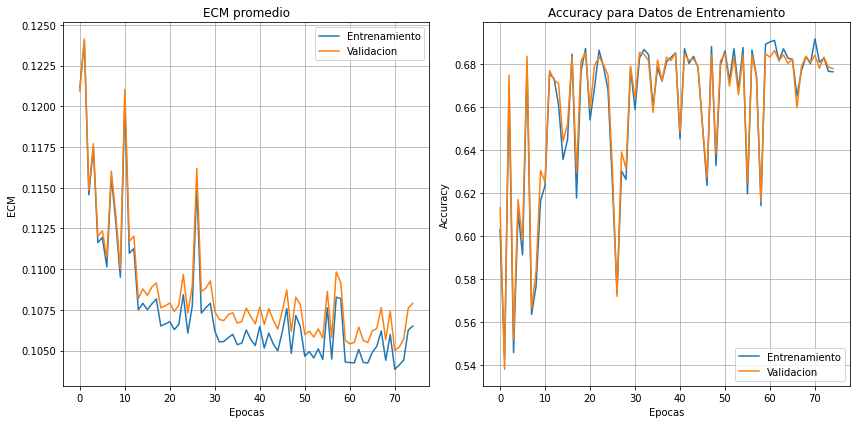

In [ ]:
#Definimos el min y max del rango de pesos
weight_range_min = -0.5
weight_range_max = 0.5

#Definimos el numero de epocas
num_of_epochs = 75

#definimos la taza de aprendizaje
learning_rate = 0.01

#momentum
a = 0.5

#dimension de los datos de entrada
h = 23
#numero de neuronas en la capa de salida
k = 1

#numero de neuronas en la capa oculta
n = 46

#inicializamos la red
MLP1 = MultiLayerPerceptron(h, n, k, a, logistic, dLogistic, 1, ECM, weight_range_min, weight_range_max)

#entrenamos la red
MLP1.train(train_data, len(train_data), train_labels, test_data, len(test_data), test_labels,  num_of_epochs, learning_rate)

print('#####' + str(n) + "#####")

MLP1.mostrarResultados()

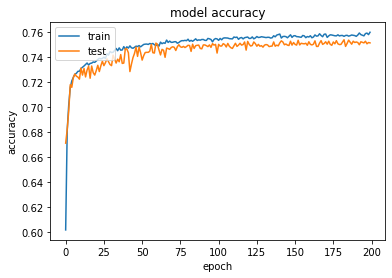

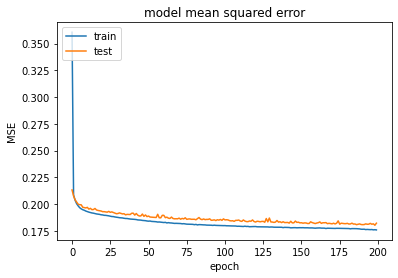

In [ ]:
# first neural network with keras tutorial
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt

# define the keras model
mlp = Sequential()
mlp.add(Dense(46, input_dim=23, activation='relu'))
mlp.add(Dense(23, activation='relu'))
mlp.add(Dense(1, activation='tanh'))

opt = Adadelta(learning_rate=0.1)

mlp.compile(loss="mean_squared_error", optimizer=opt, metrics=['accuracy', 'mean_squared_error'])
history = mlp.fit(array(train_data), array(train_labels), validation_data=(array(test_data), array(test_labels)), epochs=200, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mean squared error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt


from random import randint
N = (len(train_data)//3) -1

E1data = train_data[:N]
E1labels = train_labels[:N]

E2data = train_data[N:N * 2]
E2labels = train_labels[N:N * 2]

E3data = train_data[N * 2:N * 3]
E3labels = train_labels[N * 2:N * 3]

exp2data = []
exp2labels = []

exp3data = []
exp3labels = []

mlp1 = Sequential()
mlp1.add(Dense(46, input_dim=23, activation='relu'))
mlp1.add(Dense(23, activation='relu'))
mlp1.add(Dense(1, activation='sigmoid'))
mlp1.compile(loss="mean_squared_error", optimizer=Adadelta(learning_rate=0.1), metrics=['binary_accuracy', 'mean_squared_error'])
history1 = mlp1.fit(array(E1data), array(E1labels), validation_data=(array(test_data), array(test_labels)), epochs=50, verbose=0)

acum = 0
i = 0
next = True
while acum != N:
  moneda = randint(0,1)
  if moneda == 0:
    while next:
      if round((mlp1.predict(array([E2data[i%N]])))[0][0]) == E2labels[i%N] :
        exp2data.append(E2data[i%N])
        exp2labels.append(E2labels[i%N])
        acum += 1
        i += 1
        next = False
      i += 1

  else:
    while next:
      if round((mlp1.predict(array([E2data[i%N]])))[0][0]) != E2labels[i%N] :
        exp2data.append(E2data[i%N])
        exp2labels.append(E2labels[i%N])
        acum += 1
        i += 1
        next = False
      i += 1
  i += 1
  next = True

mlp2 = Sequential()
mlp2.add(Dense(46, input_dim=23, activation='relu'))
mlp2.add(Dense(23, activation='relu'))
mlp2.add(Dense(1, activation='sigmoid'))
mlp2.compile(loss="mean_squared_error", optimizer=Adadelta(learning_rate=0.1), metrics=['binary_accuracy', 'mean_squared_error'])
history2 = mlp2.fit(array(exp2data), array(exp2labels), validation_data=(array(test_data), array(test_labels)), epochs=50, verbose=0)

acum = 0
i = 0
while acum != N:
  if round((mlp1.predict(array([E3data[i%N]])))[0][0]) !=  round((mlp2.predict(array([E3data[i%N]])))[0][0]):
    exp3data.append(E3data[i%N])
    exp3labels.append(E3labels[i%N])
    acum += 1
  i += 1

mlp3 = Sequential()
mlp3.add(Dense(46, input_dim=23, activation='relu'))
mlp3.add(Dense(23, activation='relu'))
mlp3.add(Dense(1, activation='sigmoid'))
mlp3.compile(loss="mean_squared_error", optimizer=Adadelta(learning_rate=0.1), metrics=['binary_accuracy', 'mean_squared_error'])
history3 = mlp3.fit(array(exp3data), array(exp3labels), validation_data=(array(test_data), array(test_labels)), epochs=50, verbose=0)

accuracy = 0
for i in range(len(test_data)):
    guess = round((((mlp1.predict(array([test_data[i]])))[0][0]) +  ((mlp2.predict(array([test_data[i]])))[0][0]) +  ((mlp3.predict(array([test_data[i]])))[0][0]) ) / 3)
    if guess == test_labels[i] :
        accuracy += 1
print("Boos Accuracy")
print(accuracy / len(test_data))

Boos Accuracy
0.7308317328999853


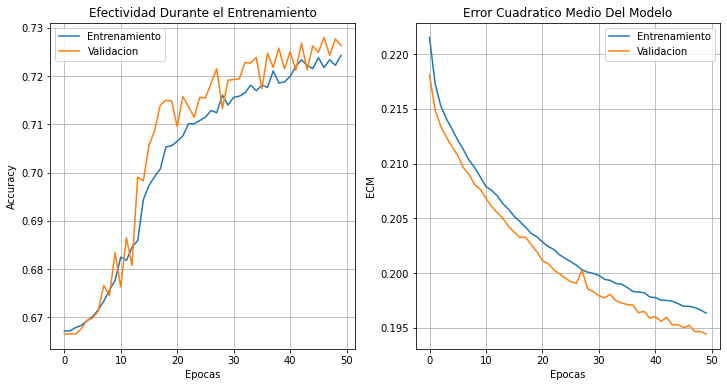

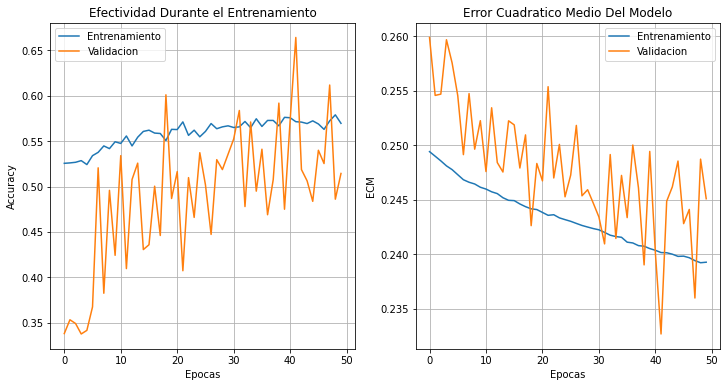

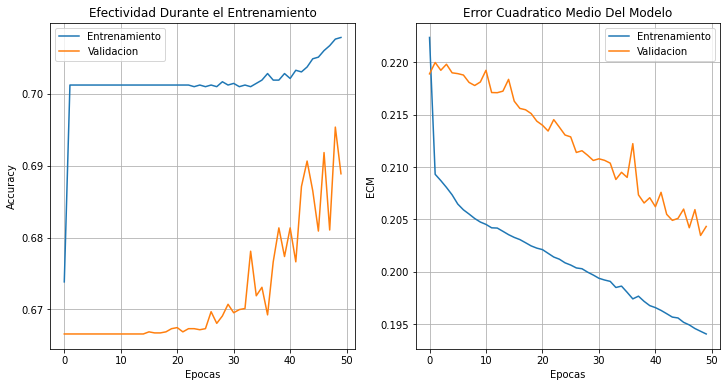

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(history1.history['binary_accuracy'])
p2 = plt.plot(history1.history['val_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.title('Efectividad Durante el Entrenamiento')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(history1.history['mean_squared_error'])
p2 = plt.plot(history1.history['val_mean_squared_error'])
plt.title('Error Cuadratico Medio Del Modelo')
plt.ylabel('ECM')
plt.xlabel('Epocas')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(history2.history['binary_accuracy'])
p2 = plt.plot(history2.history['val_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.title('Efectividad Durante el Entrenamiento')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(history2.history['mean_squared_error'])
p2 = plt.plot(history2.history['val_mean_squared_error'])
plt.title('Error Cuadratico Medio Del Modelo')
plt.ylabel('ECM')
plt.xlabel('Epocas')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(history3.history['binary_accuracy'])
p2 = plt.plot(history3.history['val_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.title('Efectividad Durante el Entrenamiento')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(history3.history['mean_squared_error'])
p2 = plt.plot(history3.history['val_mean_squared_error'])
plt.title('Error Cuadratico Medio Del Modelo')
plt.ylabel('ECM')
plt.xlabel('Epocas')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)
plt.show()

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt


from random import randint
N = (len(train_data)//3) -1

E1data = train_data
E1labels = train_labels

E2data = train_data
E2labels = train_labels

E3data = train_data
E3labels = train_labels

exp2data = []
exp2labels = []

exp3data = []
exp3labels = []

mlp1 = Sequential()
mlp1.add(Dense(46, input_dim=23, activation='relu'))
mlp1.add(Dense(23, activation='relu'))
mlp1.add(Dense(1, activation='sigmoid'))
mlp1.compile(loss="mean_squared_error", optimizer=Adadelta(learning_rate=0.1), metrics=['binary_accuracy', 'mean_squared_error'])
history1 = mlp1.fit(array(E1data), array(E1labels), validation_data=(array(test_data), array(test_labels)), epochs=50, verbose=0)

acum = 0
i = 0
next = True
while acum != N:
  moneda = randint(0,1)
  if moneda == 0:
    while next:
      if round((mlp1.predict(array([E2data[i%N]])))[0][0]) == E2labels[i%N] :
        exp2data.append(E2data[i%N])
        exp2labels.append(E2labels[i%N])
        acum += 1
        i += 1
        next = False
      i += 1

  else:
    while next:
      if round((mlp1.predict(array([E2data[i%N]])))[0][0]) != E2labels[i%N] :
        exp2data.append(E2data[i%N])
        exp2labels.append(E2labels[i%N])
        acum += 1
        i += 1
        next = False
      i += 1
  i += 1
  next = True

mlp2 = Sequential()
mlp2.add(Dense(46, input_dim=23, activation='relu'))
mlp2.add(Dense(23, activation='relu'))
mlp2.add(Dense(1, activation='sigmoid'))
mlp2.compile(loss="mean_squared_error", optimizer=Adadelta(learning_rate=0.1), metrics=['binary_accuracy', 'mean_squared_error'])
history2 = mlp2.fit(array(exp2data), array(exp2labels), validation_data=(array(test_data), array(test_labels)), epochs=50, verbose=0)

acum = 0
i = 0
while acum != N:
  if round((mlp1.predict(array([E3data[i%N]])))[0][0]) !=  round((mlp2.predict(array([E3data[i%N]])))[0][0]):
    exp3data.append(E3data[i%N])
    exp3labels.append(E3labels[i%N])
    acum += 1
  i += 1

mlp3 = Sequential()
mlp3.add(Dense(46, input_dim=23, activation='relu'))
mlp3.add(Dense(23, activation='relu'))
mlp3.add(Dense(1, activation='sigmoid'))
mlp3.compile(loss="mean_squared_error", optimizer=Adadelta(learning_rate=0.1), metrics=['binary_accuracy', 'mean_squared_error'])
history3 = mlp3.fit(array(exp3data), array(exp3labels), validation_data=(array(test_data), array(test_labels)), epochs=50, verbose=0)

accuracy = 0
for i in range(len(test_data)):
    guess = round((((mlp1.predict(array([test_data[i]])))[0][0]) +  ((mlp2.predict(array([test_data[i]])))[0][0]) +  ((mlp3.predict(array([test_data[i]])))[0][0]) ) / 3)
    if guess == test_labels[i] :
        accuracy += 1
print("Boos Accuracy")
print(accuracy / len(test_data))

Boos Accuracy
0.7318658590633772


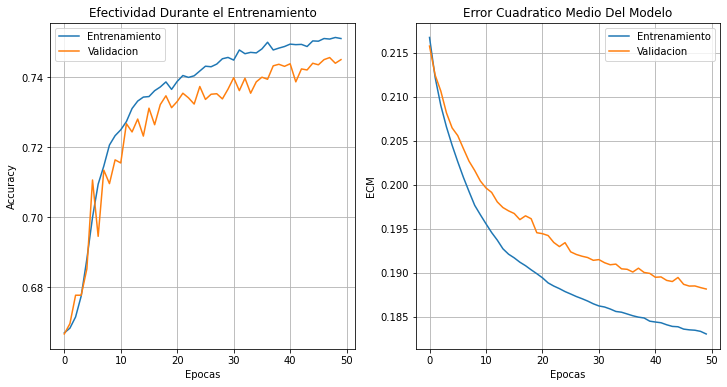

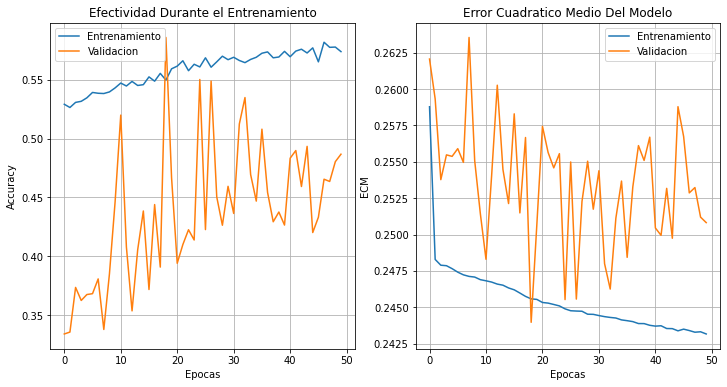

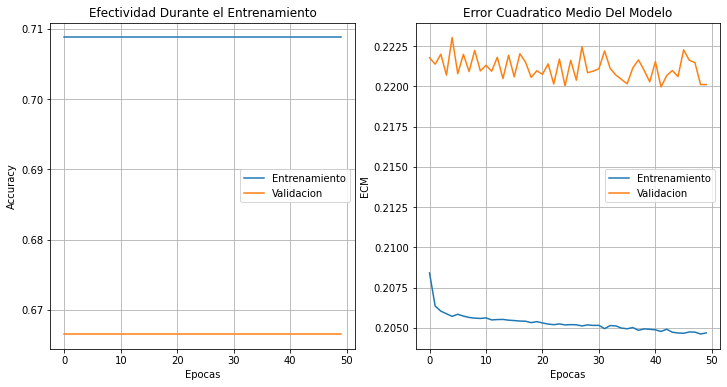

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(history1.history['binary_accuracy'])
p2 = plt.plot(history1.history['val_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.title('Efectividad Durante el Entrenamiento')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(history1.history['mean_squared_error'])
p2 = plt.plot(history1.history['val_mean_squared_error'])
plt.title('Error Cuadratico Medio Del Modelo')
plt.ylabel('ECM')
plt.xlabel('Epocas')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(history2.history['binary_accuracy'])
p2 = plt.plot(history2.history['val_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.title('Efectividad Durante el Entrenamiento')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(history2.history['mean_squared_error'])
p2 = plt.plot(history2.history['val_mean_squared_error'])
plt.title('Error Cuadratico Medio Del Modelo')
plt.ylabel('ECM')
plt.xlabel('Epocas')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plt.subplot(1, 2, 1)
p1 = plt.plot(history3.history['binary_accuracy'])
p2 = plt.plot(history3.history['val_binary_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epocas')
plt.title('Efectividad Durante el Entrenamiento')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.subplot(1, 2, 2)
p1 = plt.plot(history3.history['mean_squared_error'])
p2 = plt.plot(history3.history['val_mean_squared_error'])
plt.title('Error Cuadratico Medio Del Modelo')
plt.ylabel('ECM')
plt.xlabel('Epocas')
plt.legend((p1[0], p2[0]), ('Entrenamiento', 'Validacion'))
plt.grid(True)

plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/RNA/Proyecto/default of credit card clients.csv', skiprows=[0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


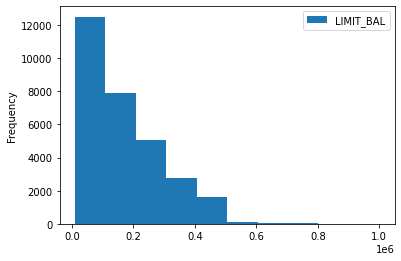

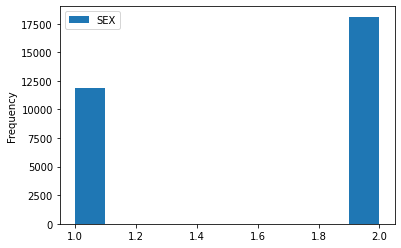

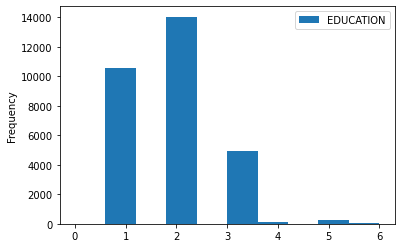

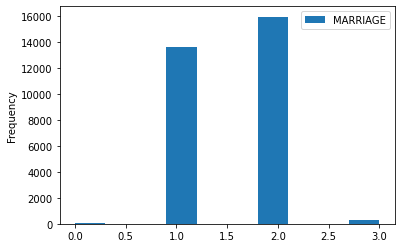

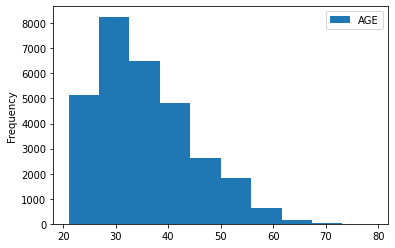

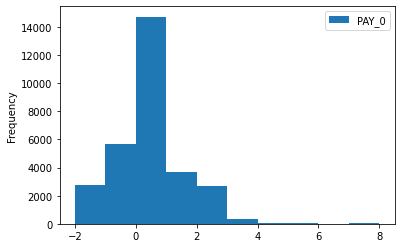

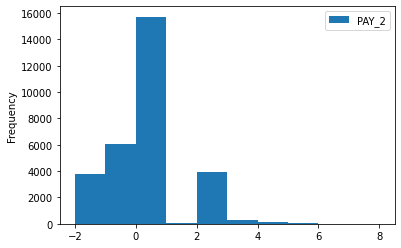

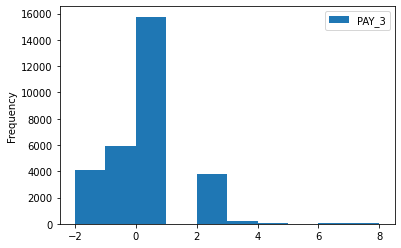

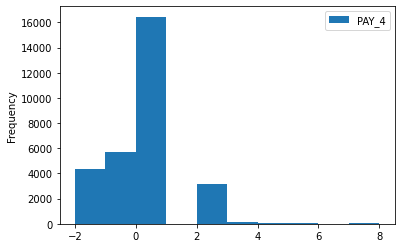

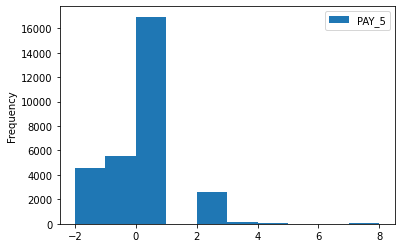

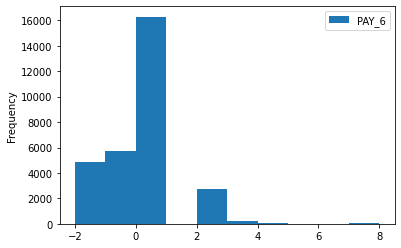

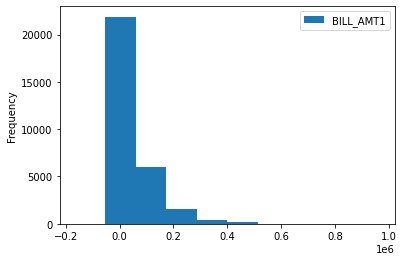

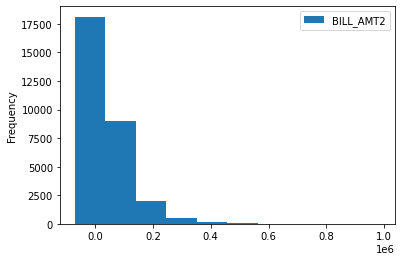

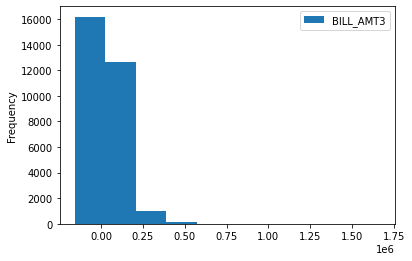

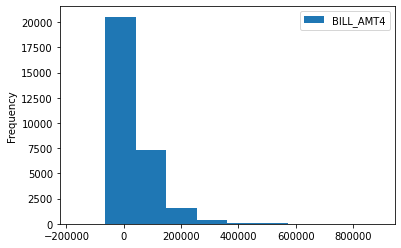

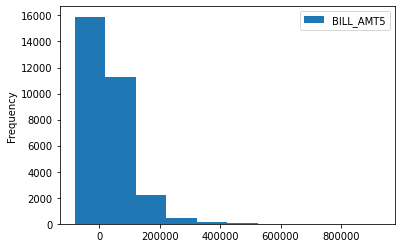

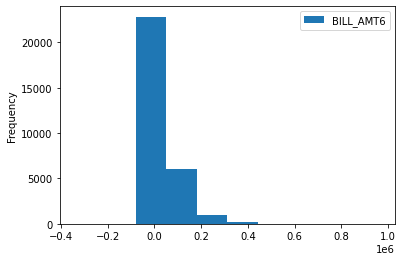

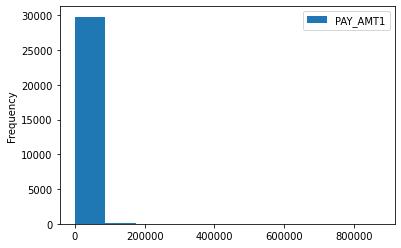

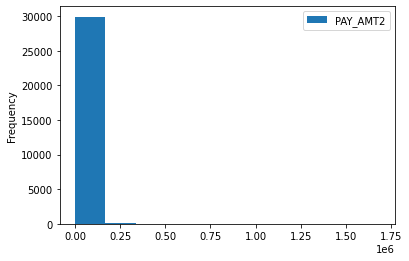

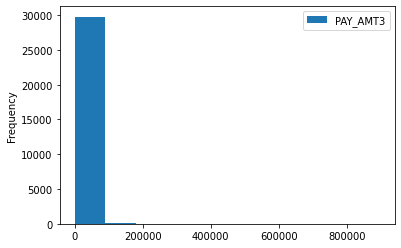

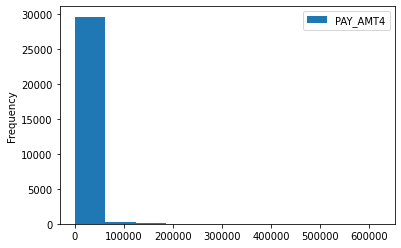

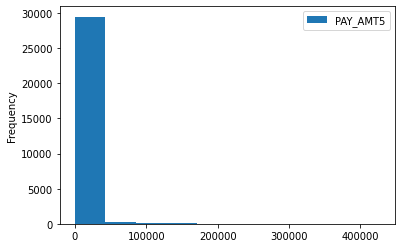

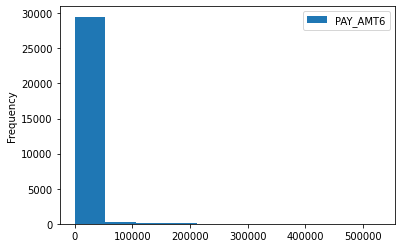

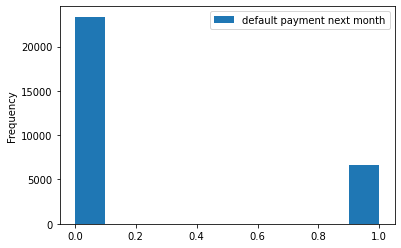

In [7]:
import matplotlib.pyplot as plt

df[['LIMIT_BAL']].plot(kind='hist')
plt.show()

df[['SEX']].plot(kind='hist')
plt.show()

df[['EDUCATION']].plot(kind='hist')
plt.show()

df[['MARRIAGE']].plot(kind='hist')
plt.show()

df[['AGE']].plot(kind='hist')
plt.show()

df[['PAY_0']].plot(kind='hist')
plt.show()

df[['PAY_2']].plot(kind='hist')
plt.show()

df[['PAY_3']].plot(kind='hist')
plt.show()

df[['PAY_4']].plot(kind='hist')
plt.show()

df[['PAY_5']].plot(kind='hist')
plt.show()

df[['PAY_6']].plot(kind='hist')
plt.show()

df[['BILL_AMT1']].plot(kind='hist')
plt.show()

df[['BILL_AMT2']].plot(kind='hist')
plt.show()

df[['BILL_AMT3']].plot(kind='hist')
plt.show()

df[['BILL_AMT4']].plot(kind='hist')
plt.show()

df[['BILL_AMT5']].plot(kind='hist')
plt.show()

df[['BILL_AMT6']].plot(kind='hist')
plt.show()

df[['PAY_AMT1']].plot(kind='hist')
plt.show()

df[['PAY_AMT2']].plot(kind='hist')
plt.show()

df[['PAY_AMT3']].plot(kind='hist')
plt.show()

df[['PAY_AMT4']].plot(kind='hist')
plt.show()

df[['PAY_AMT5']].plot(kind='hist')
plt.show()

df[['PAY_AMT6']].plot(kind='hist')
plt.show()

df[['default payment next month']].plot(kind='hist')
plt.show()

In [ ]:
print(df[['PAY_3']])

       PAY_3
0         -1
1          0
2          0
3          0
4         -1
...      ...
29995      0
29996     -1
29997      2
29998      0
29999      0

[30000 rows x 1 columns]
